prediction of antibiotic resistance for gonrhoea

In [ ]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from keras.models import  Sequential
from keras.layers import Dense
import keras.activations,keras.losses,keras.metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

In [ ]:
# Read the dataset
data = pd.read_csv('/content/metadata.csv')
data

,Sample_ID,Year,Country,Continent,Beta.lactamase,Azithromycin,Ciprofloxacin,Ceftriaxone,Cefixime,Tetracycline,...,log2_cro_mic,log2_cfx_mic,log2_tet_mic,log2_pen_mic,azm_sr,cip_sr,cro_sr,cfx_sr,tet_sr,pen_sr
0,ERR1549286,2015.0,UK,Europe,NaN,>256,NaN,0.016,NaN,NaN,...,-5.965784,NaN,NaN,NaN,1.0,NaN,0.0,NaN,NaN,NaN
1,ERR1549290,2015.0,UK,Europe,NaN,>256,NaN,0.004,NaN,NaN,...,-7.965784,NaN,NaN,NaN,1.0,NaN,0.0,NaN,NaN,NaN
2,ERR1549291,2015.0,UK,Europe,NaN,>256,NaN,0.006,NaN,NaN,...,-7.380822,NaN,NaN,NaN,1.0,NaN,0.0,NaN,NaN,NaN
3,ERR1549287,2015.0,UK,Europe,NaN,>256,NaN,0.006,NaN,NaN,...,-7.380822,NaN,NaN,NaN,1.0,NaN,0.0,NaN,NaN,NaN
4,ERR1549288,2015.0,UK,Europe,NaN,>256,NaN,0.008,NaN,NaN,...,-6.965784,NaN,NaN,NaN,1.0,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3781,ERR2172350,2016.0,UK,Europe,NaN,>256,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3782,ERR2172351,2016.0,UK,Europe,NaN,>256,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3783,ERR2172352,2016.0,UK,Europe,NaN,>256,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3784,ERR2172353,2015.0,UK,Europe,NaN,>256,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


EDA - Exploratory data Analysis


In [ ]:
data.head()

,Sample_ID,Year,Country,Continent,Beta.lactamase,Azithromycin,Ciprofloxacin,Ceftriaxone,Cefixime,Tetracycline,...,log2_cro_mic,log2_cfx_mic,log2_tet_mic,log2_pen_mic,azm_sr,cip_sr,cro_sr,cfx_sr,tet_sr,pen_sr
0,ERR1549286,2015.0,UK,Europe,NaN,>256,NaN,0.016,NaN,NaN,...,-5.965784,NaN,NaN,NaN,1.0,NaN,0.0,NaN,NaN,NaN
1,ERR1549290,2015.0,UK,Europe,NaN,>256,NaN,0.004,NaN,NaN,...,-7.965784,NaN,NaN,NaN,1.0,NaN,0.0,NaN,NaN,NaN
2,ERR1549291,2015.0,UK,Europe,NaN,>256,NaN,0.006,NaN,NaN,...,-7.380822,NaN,NaN,NaN,1.0,NaN,0.0,NaN,NaN,NaN
3,ERR1549287,2015.0,UK,Europe,NaN,>256,NaN,0.006,NaN,NaN,...,-7.380822,NaN,NaN,NaN,1.0,NaN,0.0,NaN,NaN,NaN
4,ERR1549288,2015.0,UK,Europe,NaN,>256,NaN,0.008,NaN,NaN,...,-6.965784,NaN,NaN,NaN,1.0,NaN,0.0,NaN,NaN,NaN


In [ ]:
data.info

<bound method DataFrame.info of        Sample_ID    Year Country Continent Beta.lactamase Azithromycin  \
0     ERR1549286  2015.0      UK    Europe            NaN         >256   
1     ERR1549290  2015.0      UK    Europe            NaN         >256   
2     ERR1549291  2015.0      UK    Europe            NaN         >256   
3     ERR1549287  2015.0      UK    Europe            NaN         >256   
4     ERR1549288  2015.0      UK    Europe            NaN         >256   
...          ...     ...     ...       ...            ...          ...   
3781  ERR2172350  2016.0      UK    Europe            NaN         >256   
3782  ERR2172351  2016.0      UK    Europe            NaN         >256   
3783  ERR2172352  2016.0      UK    Europe            NaN         >256   
3784  ERR2172353  2015.0      UK    Europe            NaN         >256   
3785  ERR2172354  2014.0      UK    Europe            NaN         0.19   

     Ciprofloxacin Ceftriaxone Cefixime Tetracycline  ... log2_cro_mic  \
0    

In [ ]:
data.columns

Index(['Sample_ID', 'Year', 'Country', 'Continent', 'Beta.lactamase',
       'Azithromycin', 'Ciprofloxacin', 'Ceftriaxone', 'Cefixime',
       'Tetracycline', 'Penicillin', 'NG_MAST', 'Group', 'azm_mic', 'cip_mic',
       'cro_mic', 'cfx_mic', 'tet_mic', 'pen_mic', 'log2_azm_mic',
       'log2_cip_mic', 'log2_cro_mic', 'log2_cfx_mic', 'log2_tet_mic',
       'log2_pen_mic', 'azm_sr', 'cip_sr', 'cro_sr', 'cfx_sr', 'tet_sr',
       'pen_sr'],
      dtype='object')

In [ ]:
data.describe()

,Year,Group,azm_mic,cip_mic,cro_mic,cfx_mic,tet_mic,pen_mic,log2_azm_mic,log2_cip_mic,log2_cro_mic,log2_cfx_mic,log2_tet_mic,log2_pen_mic,azm_sr,cip_sr,cro_sr,cfx_sr,tet_sr,pen_sr
count,3536.000000,3786.000000,3478.000000,3088.000000,3434.000000,3401.000000,1472.00000,1465.000000,3478.000000,3088.000000,3434.000000,3401.000000,1472.000000,1465.000000,3478.000000,3088.000000,3434.000000,3401.00000,1472.000000,1465.00000
mean,2010.300622,394.334390,17.118781,7.428788,0.029991,0.064405,7.38609,3.044142,-1.107628,-2.043590,-6.203940,-5.164221,0.835492,-0.427788,0.128522,0.462435,0.001165,0.00147,0.554348,0.34744
std,4.670817,326.263267,90.864520,11.266796,0.080375,0.199151,22.10079,15.447995,2.749441,5.444110,1.772691,1.664672,2.337490,2.259337,0.334718,0.498668,0.034115,0.03832,0.497206,0.47632
min,1979.000000,0.000000,0.004000,0.001000,0.000250,0.001000,0.00800,0.002000,-7.965784,-9.965784,-11.965784,-9.965784,-6.965784,-8.965784,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
25%,2009.000000,134.000000,0.125000,0.004000,0.004000,0.015000,0.50000,0.250000,-3.000000,-7.965784,-7.965784,-6.058894,-1.000000,-2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
50%,2012.000000,275.000000,0.380000,0.094000,0.015000,0.016000,2.00000,0.500000,-1.395929,-3.411195,-6.058894,-5.965784,1.000000,-1.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.00000
75%,2013.000000,618.000000,1.000000,16.000000,0.032000,0.060000,4.00000,2.000000,0.000000,4.000000,-4.965784,-4.058894,2.000000,1.000000,0.000000,1.000000,0.000000,0.00000,1.000000,1.00000
max,2017.000000,1078.000000,1024.000000,64.000000,2.000000,8.000000,256.00000,512.000000,10.000000,6.000000,1.000000,3.000000,8.000000,9.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000


In [ ]:
data.isnull().sum()

Sample_ID            0
Year               250
Country              1
Continent            1
Beta.lactamase    1859
Azithromycin       306
Ciprofloxacin      657
Ceftriaxone        350
Cefixime           381
Tetracycline      2314
Penicillin        2321
NG_MAST              7
Group                0
azm_mic            308
cip_mic            698
cro_mic            352
cfx_mic            385
tet_mic           2314
pen_mic           2321
log2_azm_mic       308
log2_cip_mic       698
log2_cro_mic       352
log2_cfx_mic       385
log2_tet_mic      2314
log2_pen_mic      2321
azm_sr             308
cip_sr             698
cro_sr             352
cfx_sr             385
tet_sr            2314
pen_sr            2321
dtype: int64

In [ ]:
# Data Transformation
lab=LabelEncoder()
for i in data.columns.values:
    data[i]=lab.fit_transform(data[i])

print(data)

      Sample_ID  Year  Country  Continent  Beta.lactamase  Azithromycin  \
0          2651    27       61          3               5            29   
1          2655    27       61          3               5            29   
2          2656    27       61          3               5            29   
3          2652    27       61          3               5            29   
4          2653    27       61          3               5            29   
...         ...   ...      ...        ...             ...           ...   
3781       2761    28       61          3               5            29   
3782       2762    28       61          3               5            29   
3783       2763    28       61          3               5            29   
3784       2764    27       61          3               5            29   
3785       2765    26       61          3               5            12   

      Ciprofloxacin  Ceftriaxone  Cefixime  Tetracycline  ...  log2_cro_mic  \
0                45 

In [ ]:
# Forward fill missing values
data.fillna(method='ffill', inplace=True)

In [ ]:
data.isnull().sum()

Sample_ID         0
Year              0
Country           0
Continent         0
Beta.lactamase    0
Azithromycin      0
Ciprofloxacin     0
Ceftriaxone       0
Cefixime          0
Tetracycline      0
Penicillin        0
NG_MAST           0
Group             0
azm_mic           0
cip_mic           0
cro_mic           0
cfx_mic           0
tet_mic           0
pen_mic           0
log2_azm_mic      0
log2_cip_mic      0
log2_cro_mic      0
log2_cfx_mic      0
log2_tet_mic      0
log2_pen_mic      0
azm_sr            0
cip_sr            0
cro_sr            0
cfx_sr            0
tet_sr            0
pen_sr            0
dtype: int64

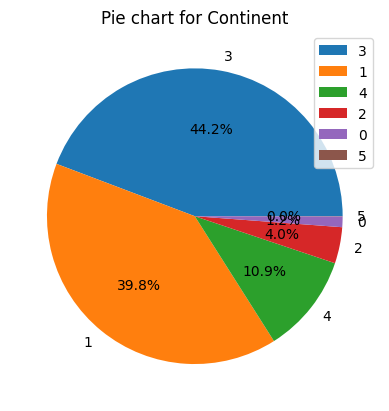

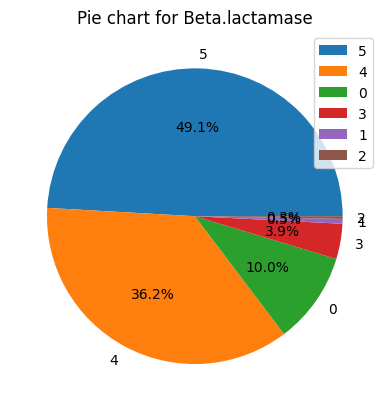

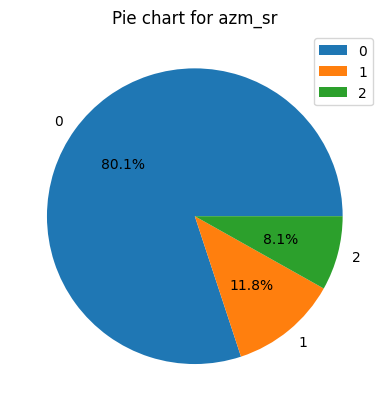

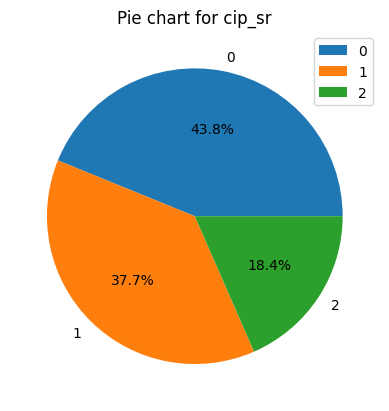

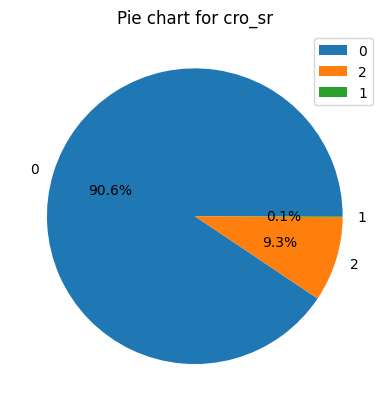

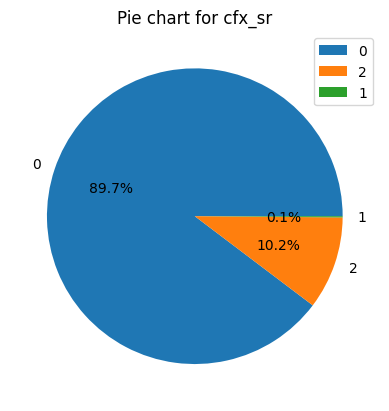

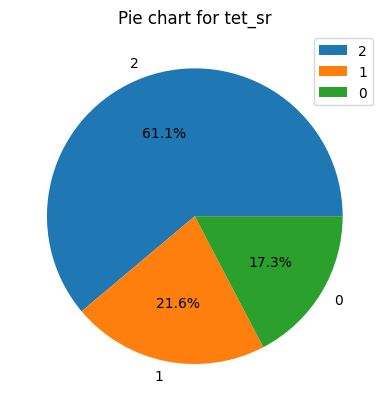

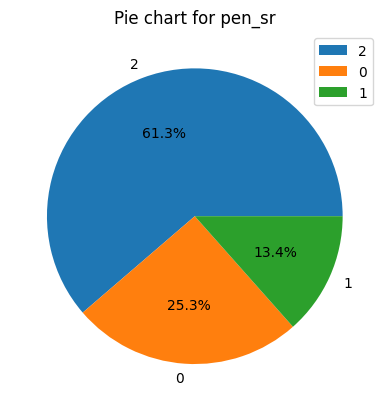

In [ ]:
# Pie chart regarding the data
for column in data.columns:
    if data[column].nunique() <= 10:
        values = data[column].value_counts().values
        labels = data[column].value_counts().index
        plt.pie(values, labels=labels, autopct='%1.1f%%')
        plt.title(f"Pie chart for {column}")
        plt.legend()
        plt.show()

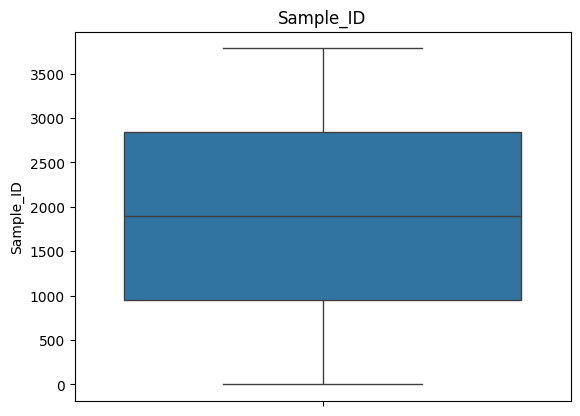

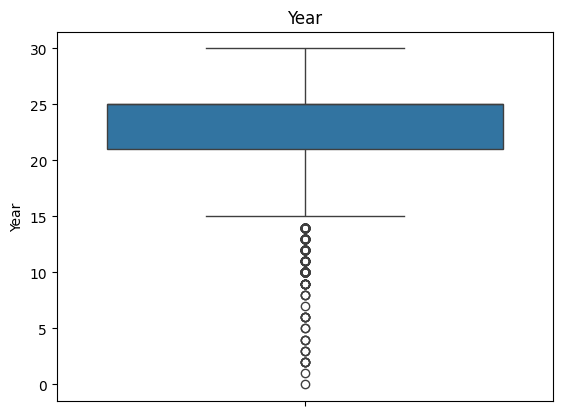

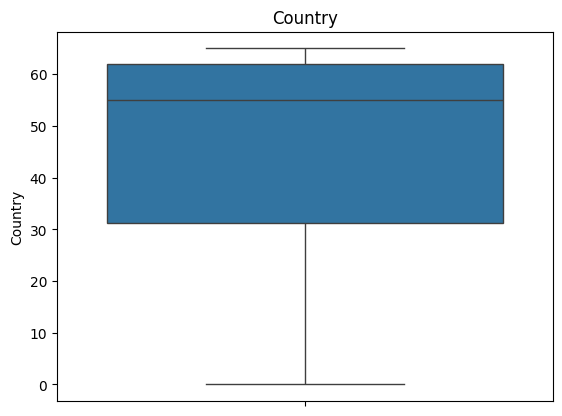

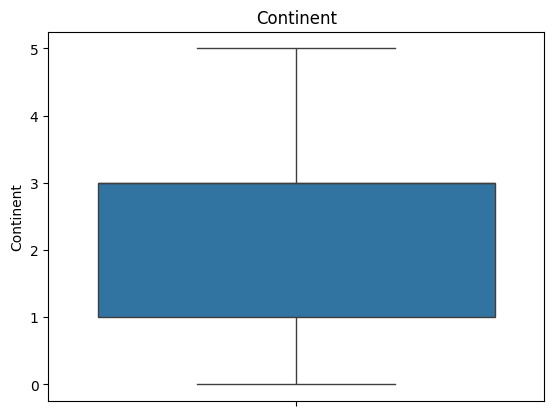

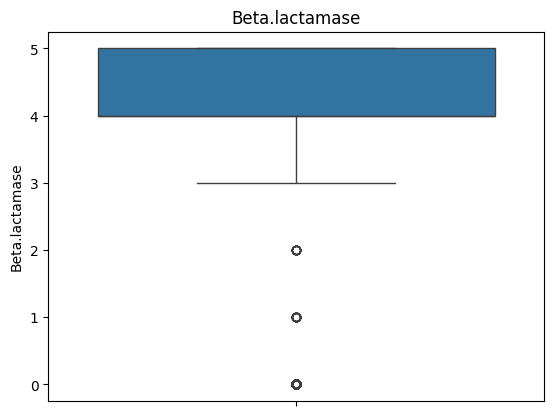

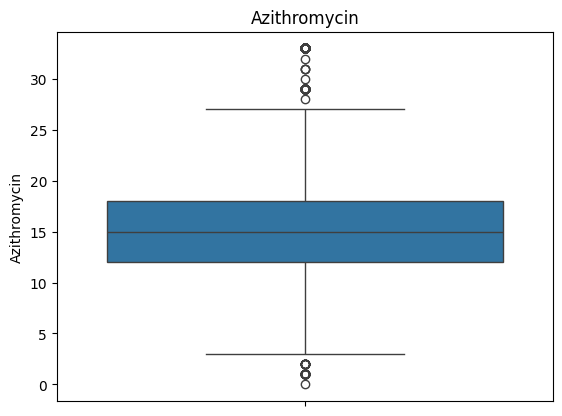

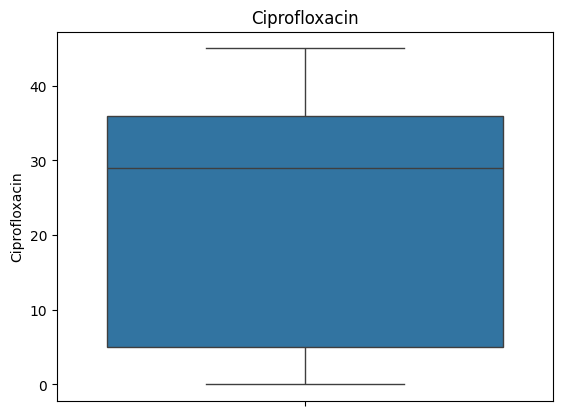

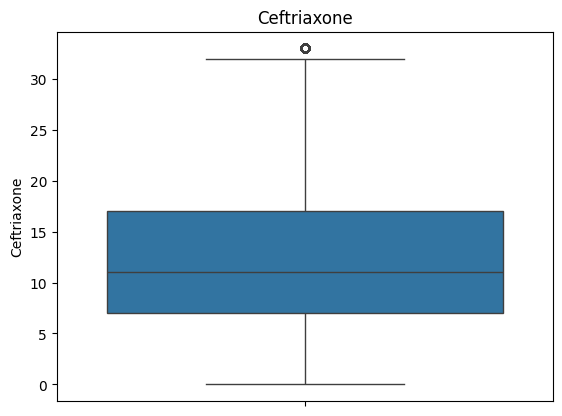

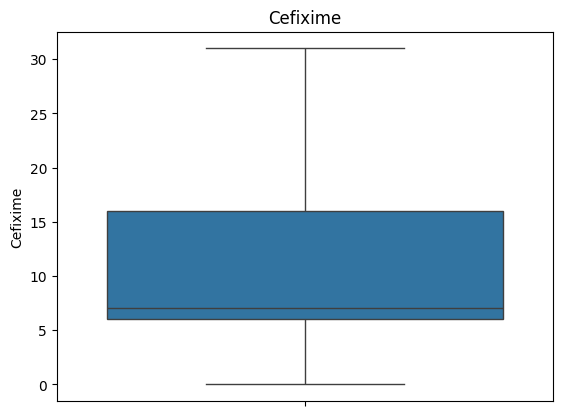

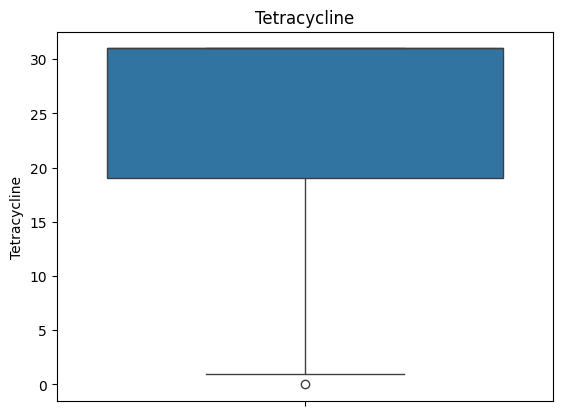

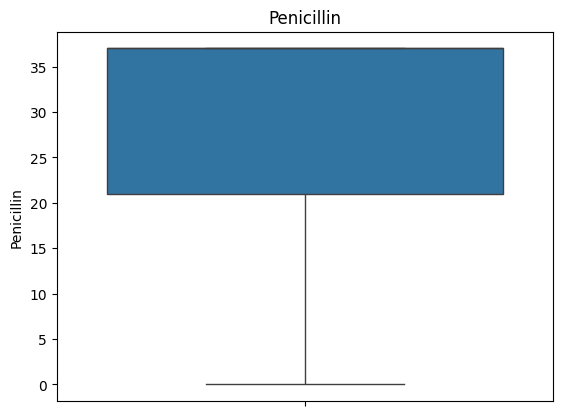

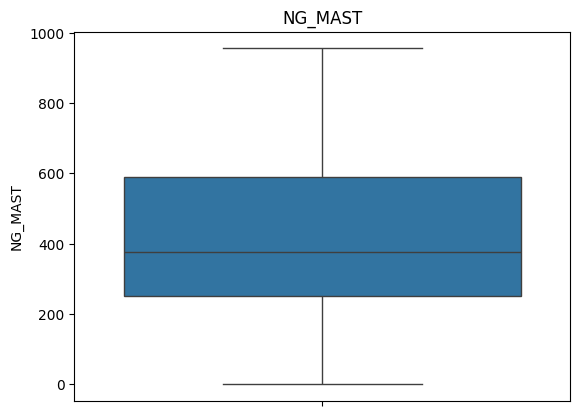

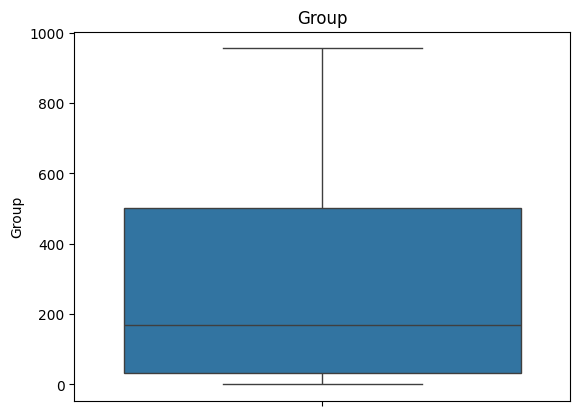

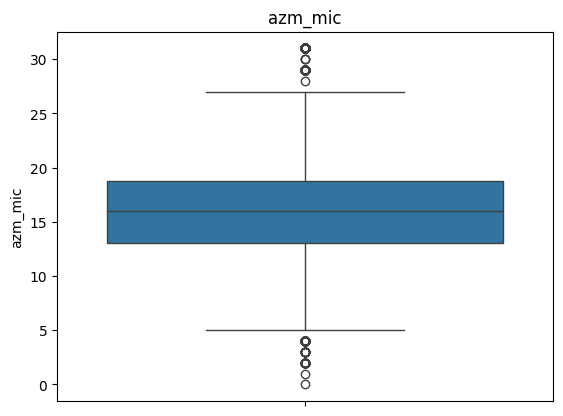

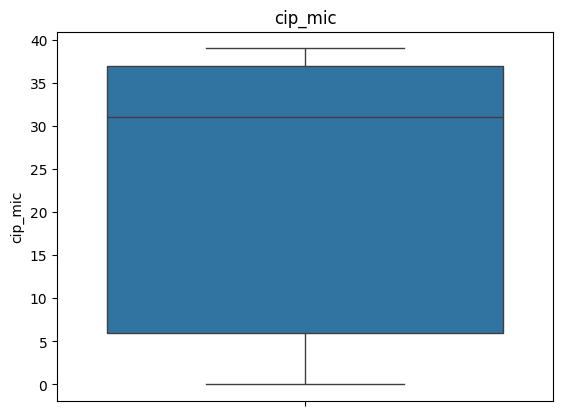

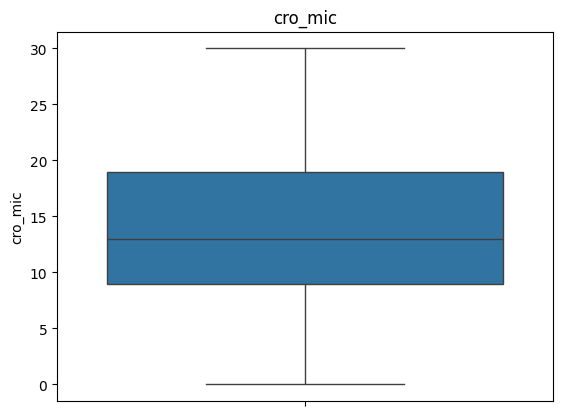

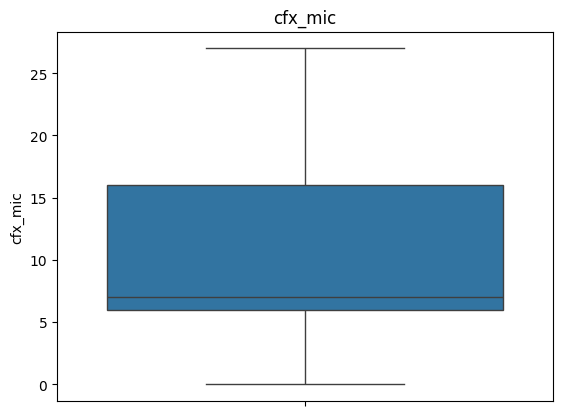

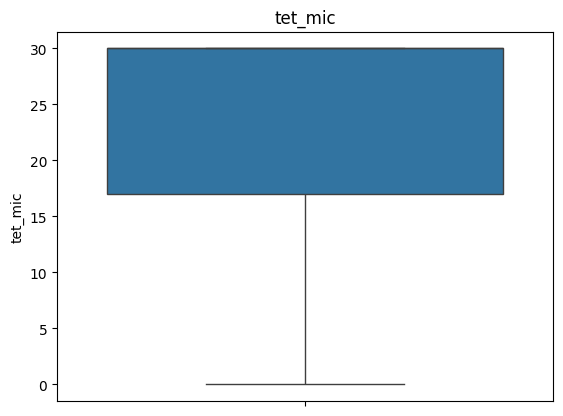

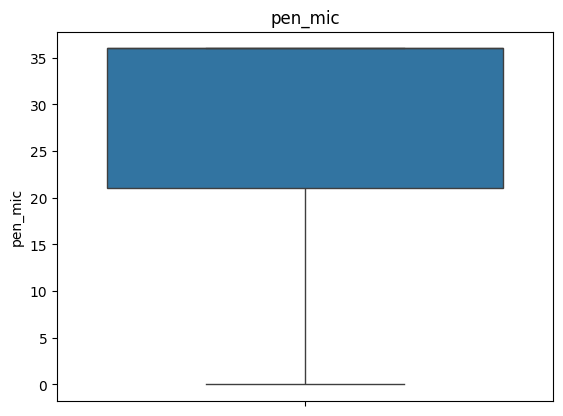

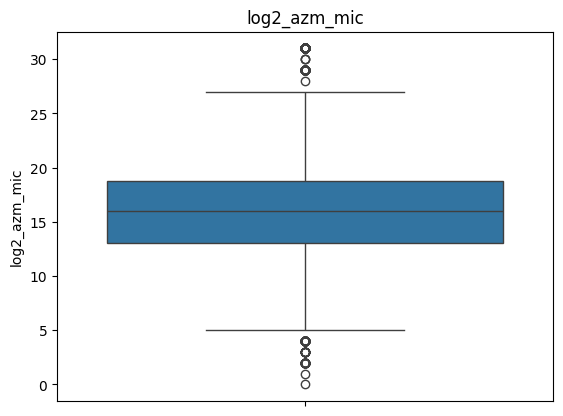

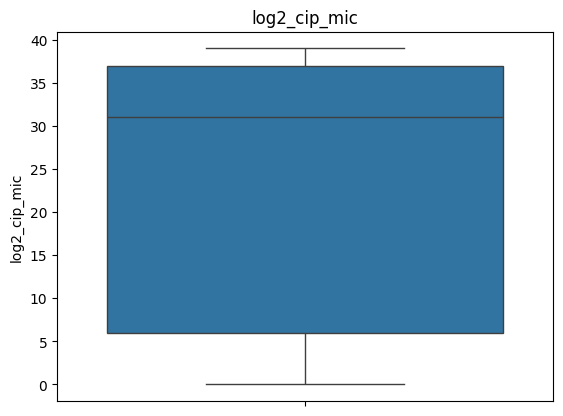

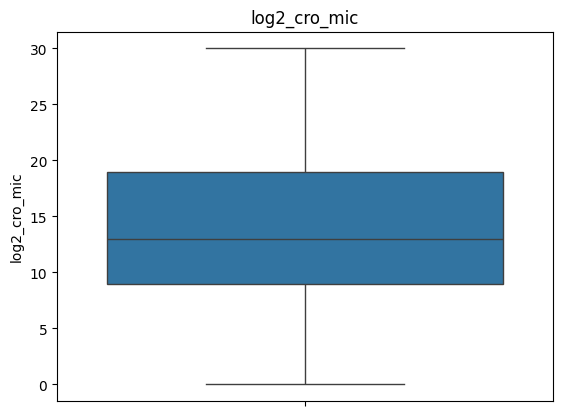

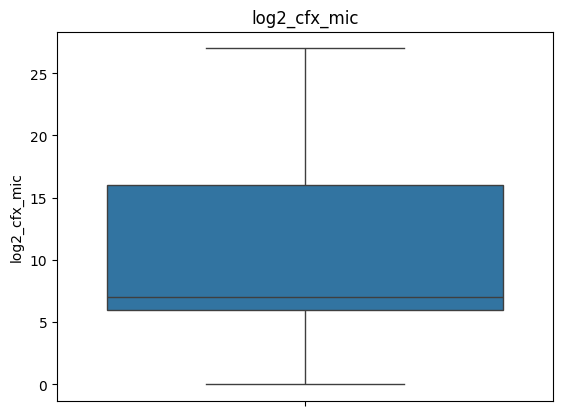

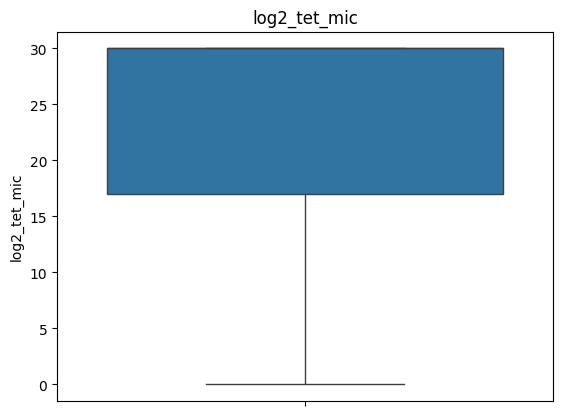

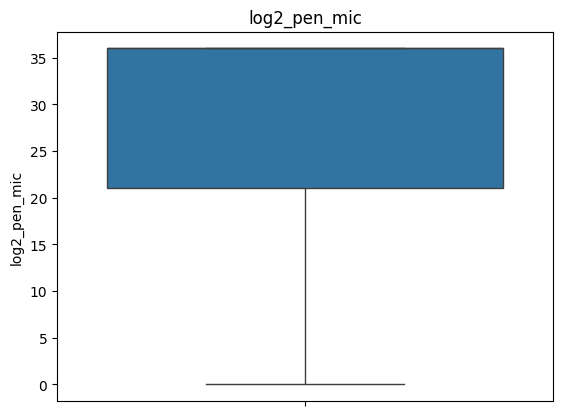

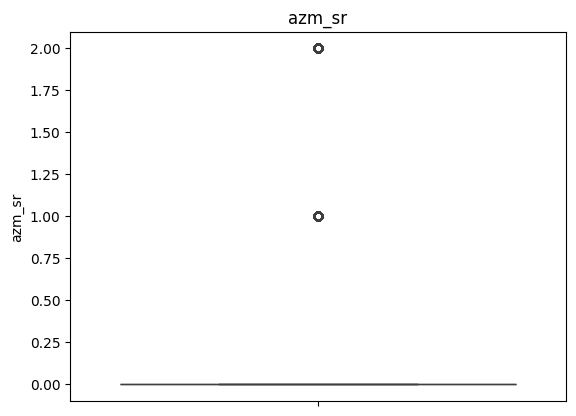

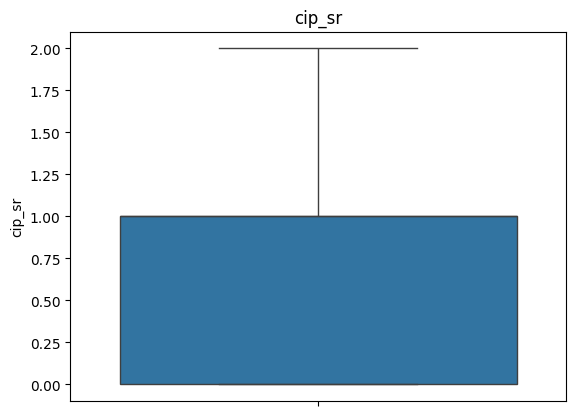

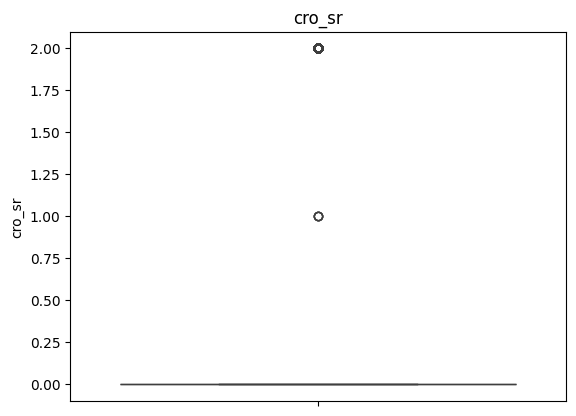

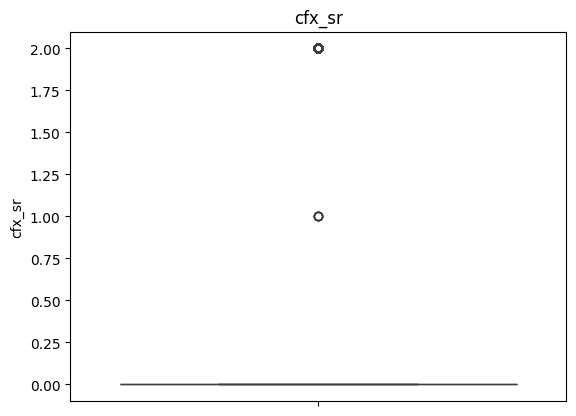

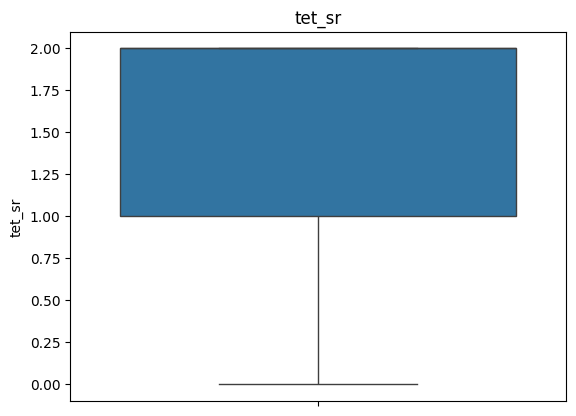

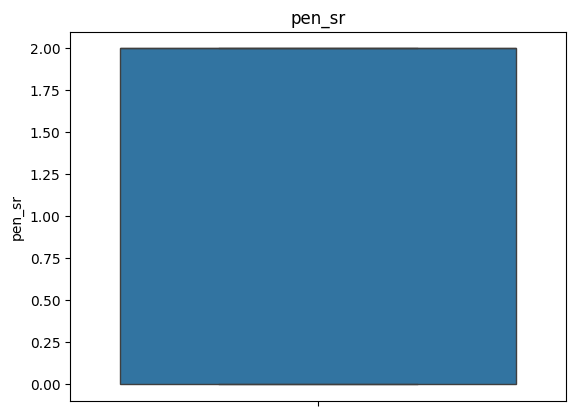

In [ ]:
# Box plot information for gathering the outliers information
for i in data.columns.values:
    sns.boxplot(data[i])
    plt.title(f'{i}')
    plt.show()

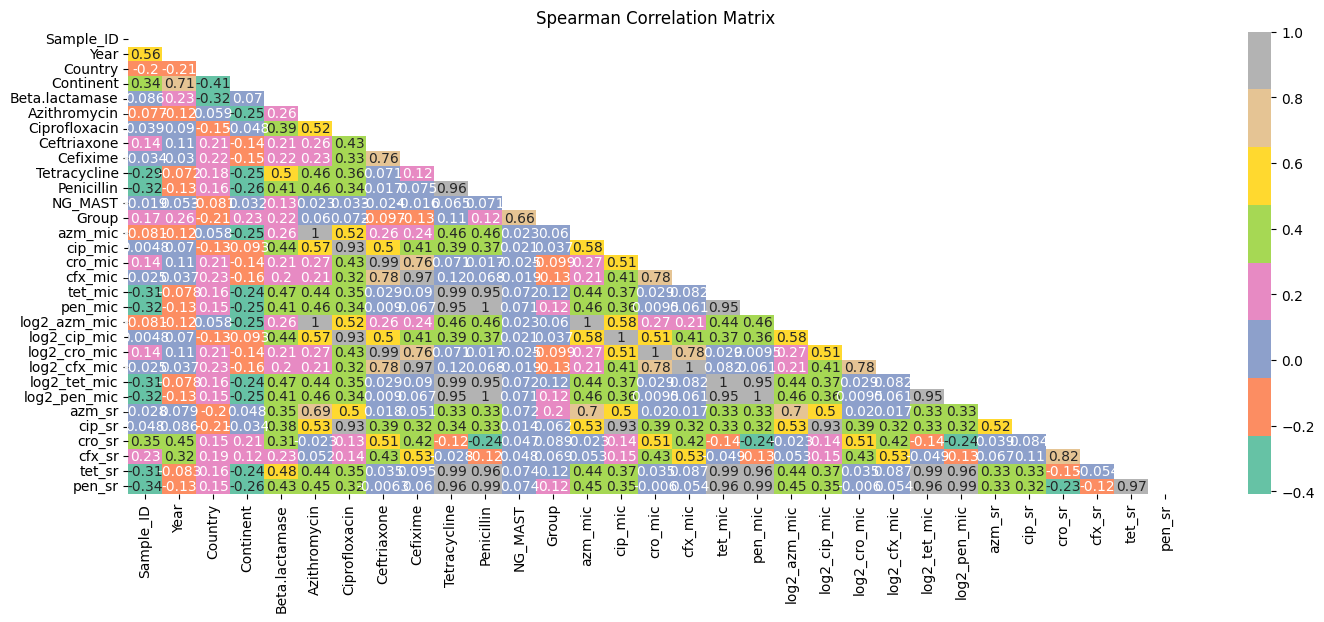

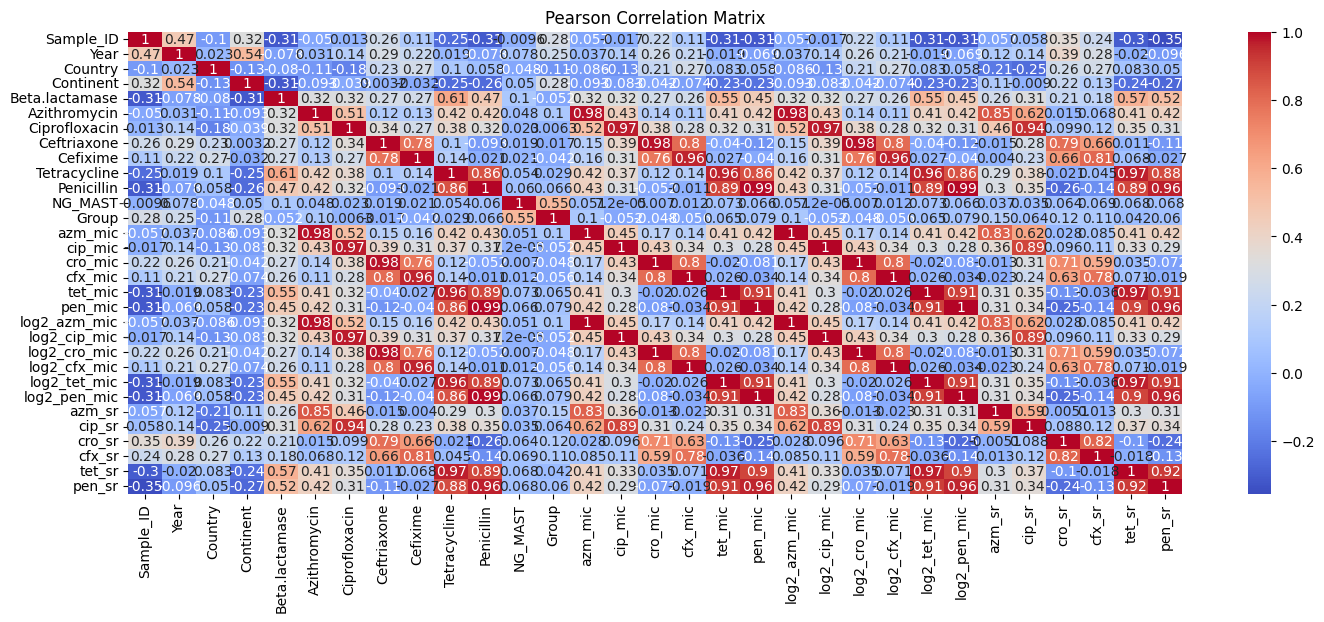

In [ ]:
# Data correlation visualization using Heatmap
# Using Spearman correlation with seaborn
plt.figure(figsize=(17, 6))
corr_spearman = data.corr(method='spearman')
mask_spearman = np.triu(corr_spearman)
sns.heatmap(corr_spearman, mask=mask_spearman, annot=True, cmap="Set2")
plt.title("Spearman Correlation Matrix")
plt.show()

# Using Pearson correlation with seaborn
plt.figure(figsize=(17, 6))
corr_pearson = data.corr()
sns.heatmap(corr_pearson, annot=True, cmap='coolwarm')
plt.title("Pearson Correlation Matrix")
plt.show()

In [ ]:
# Joint plot
hue_variable = 'pen_sr'

for i in data.columns:
    for j in data.columns:
        if i != j:
            sns.jointplot(data=data, x=i, y=j, hue=hue_variable)
            plt.show()

In [ ]:
# value counts
for i in data.columns.values:
    print(data[i].value_counts())

2651    1
618     1
1799    1
922     1
1810    1
       ..
2219    1
2220    1
2221    1
2222    1
2765    1
Name: Sample_ID, Length: 3786, dtype: int64
25    1196
27     439
22     284
23     275
30     250
24     222
21     219
16     126
19     113
10      99
17      82
20      78
14      59
18      53
12      51
26      49
13      47
15      40
28      32
11      29
9       11
29       8
2        5
6        5
3        3
4        3
8        3
5        2
1        1
0        1
7        1
Name: Year, dtype: int64
62    1121
61     493
42     400
11     372
55     132
      ... 
13       1
18       1
12       1
48       1
38       1
Name: Country, Length: 66, dtype: int64
3    1675
1    1505
4     411
2     150
0      44
5       1
Name: Continent, dtype: int64
5    1859
4    1371
0     379
3     146
1      20
2      11
Name: Beta.lactamase, dtype: int64
13    698
15    697
33    306
11    297
17    277
21    186
27    151
10    110
6     107
29    101
12     97
25     92
20     89
3   

In [ ]:
# Data categorization based on the correlation between them
x=data[['Tetracycline', 'Penicillin','azm_mic','tet_sr','log2_tet_mic','log2_pen_mic',
        'tet_mic','pen_mic','Beta.lactamase','Azithromycin','cip_mic',
        'log2_azm_mic','log2_cip_mic', 'cip_sr','Ciprofloxacin']]

y=data[['pen_sr']]


Machine learning based approach

In [ ]:
# Split the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The logistic regression accuracy: 0.8621236133122029


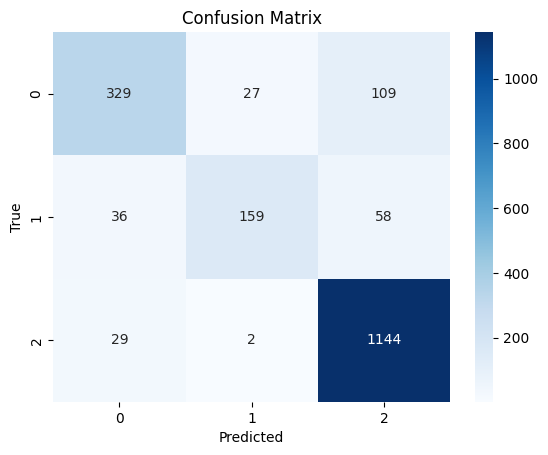

Precision: 0.8621236133122029
Recall: 0.8621236133122029
F1 Score: 0.8621236133122029


In [ ]:
# Create and train the logistic regression model
lr = LogisticRegression(max_iter=35)
lr.fit(x_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('The logistic regression accuracy:', accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Precision, Recall, F1 Score (micro, macro, weighted are options for average)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)


Decision Tree accuracy: 0.8663497094558901


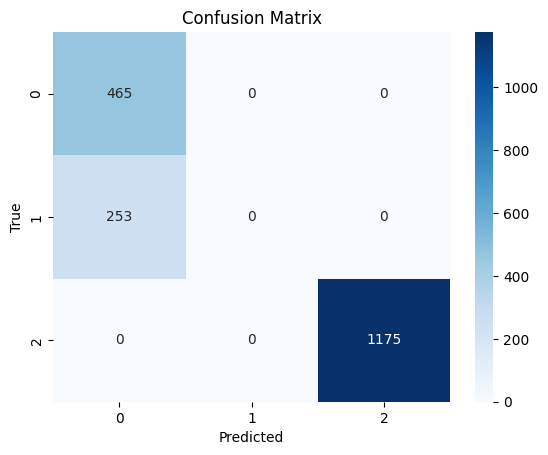

Precision: 0.8663497094558901
Recall: 0.8663497094558901
F1 Score: 0.8663497094558902


In [ ]:
# Create and train the decision tree classifier
tree = DecisionTreeClassifier(criterion='gini', max_depth=1)
tree.fit(x_train, y_train)

# Make predictions on the test set
y_pred = tree.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Decision Tree accuracy:', accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Precision, Recall, F1 Score (micro, macro, weighted are options for average)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)


<ipython-input-29-b10ac031f0b9>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rforest.fit(x_train, y_train)


Random Forest accuracy: 0.8663497094558901


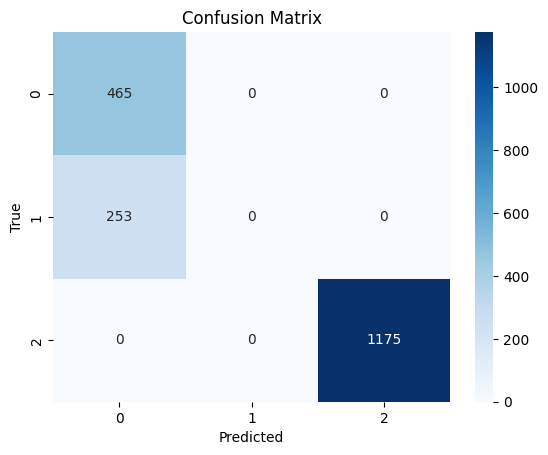

Precision: 0.8663497094558901
Recall: 0.8663497094558901
F1 Score: 0.8663497094558902


In [ ]:
# Create and train the Random Forest classifier
rforest = RandomForestClassifier(criterion='gini', max_depth=1)
rforest.fit(x_train, y_train)

# Make predictions on the test set
y_pred = rforest.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Random Forest accuracy:', accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Precision, Recall, F1 Score (micro, macro, weighted are options for average)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Deep learning based approach

Epoch 1/100
76/76 [==============================] - 2s 15ms/step - loss: 0.7175 - accuracy: 0.8436 - val_loss: 0.4869 - val_accuracy: 0.8711
Epoch 2/100
76/76 [==============================] - 1s 9ms/step - loss: 0.4216 - accuracy: 0.8669 - val_loss: 0.3493 - val_accuracy: 0.8848
Epoch 3/100
76/76 [==============================] - 1s 8ms/step - loss: 0.3331 - accuracy: 0.9107 - val_loss: 0.2879 - val_accuracy: 0.9361
Epoch 4/100
76/76 [==============================] - 0s 5ms/step - loss: 0.2805 - accuracy: 0.9403 - val_loss: 0.2392 - val_accuracy: 0.9683
Epoch 5/100
76/76 [==============================] - 0s 4ms/step - loss: 0.2354 - accuracy: 0.9667 - val_loss: 0.1999 - val_accuracy: 0.9789
Epoch 6/100
76/76 [==============================] - 0s 4ms/step - loss: 0.1991 - accuracy: 0.9773 - val_loss: 0.1706 - val_accuracy: 0.9847
Epoch 7/100
76/76 [==============================] - 0s 6ms/step - loss: 0.1709 - accuracy: 0.9847 - val_loss: 0.1479 - val_accuracy: 0.9868
Epoch 8/100


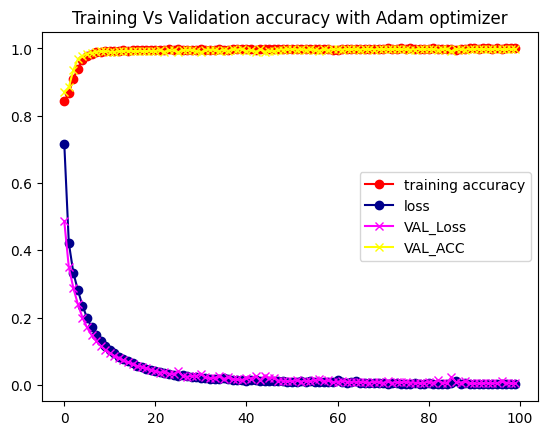

60/60 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 0.9989
Accuracy: 0.9989434480667114
Precision: 0.9989434759640782
Recall: 0.9989434759640782
F1 Score: 0.9989434759640782


In [ ]:
# Artificial neural network
# Assuming X and Y are your features and target variable
X = data[['Tetracycline', 'Penicillin', 'azm_mic', 'tet_sr', 'log2_tet_mic', 'log2_pen_mic',
          'tet_mic', 'pen_mic', 'Beta.lactamase', 'Azithromycin', 'cip_mic',
          'log2_azm_mic', 'log2_cip_mic', 'cip_sr', 'Ciprofloxacin']]

Y = pd.get_dummies(data['pen_sr'])

# Split the data into training and testing sets
x_Train, x_Test, y_Train, y_Test = train_test_split(X, Y, test_size=0.5, random_state=42)

# Standardize the data
scaler = StandardScaler()
x_Train = scaler.fit_transform(x_Train)
x_Test = scaler.transform(x_Test)

# Build the neural network model
model = Sequential()
model.add(Dense(units=32, input_dim=X.shape[1], activation='relu'))
model.add(Dense(units=16, activation='tanh'))
model.add(Dense(units=8, activation='sigmoid'))
model.add(Dense(units=Y.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_Train, y_Train, batch_size=25, epochs=100, validation_data=(x_Test, y_Test), validation_batch_size=35)

# Plot the training history
plt.plot(history.history['accuracy'], label='training accuracy', marker='o', color='red')
plt.plot(history.history['loss'], label='loss', marker='o', color='darkblue')
plt.plot(history.history['val_loss'], label="VAL_Loss", marker='x', color='magenta')
plt.plot(history.history['val_accuracy'], label="VAL_ACC", marker='x', color='yellow')
plt.title('Training Vs Validation accuracy with Adam optimizer')
plt.legend()
plt.show()
# Make predictions on the test set
y_pred = model.predict(x_Test)
y_pred_labels = np.argmax(y_pred, axis=1)  # Convert one-hot encoded predictions to class labels
y_test_labels = np.argmax(y_Test.values, axis=1)  # Convert one-hot encoded true labels to class labels

# Precision, Recall, F1 Score (micro, macro, weighted are options for average)
precision = precision_score(y_test_labels, y_pred_labels, average='micro')
recall = recall_score(y_test_labels, y_pred_labels, average='micro')
f1 = f1_score(y_test_labels, y_pred_labels, average='micro')
# Evaluate the model on the test set
evaluation = model.evaluate(x_Test, y_Test)

# Extract the accuracy from the evaluation result
accuracy = evaluation[1]
print('Accuracy:', accuracy)


print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)